In [77]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [90]:
imdb = pd.read_csv('C:/Users/Aakash Sharma/Desktop/Unstructured data/NLP/imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [103]:
stop_nltk = stopwords.words("english")
stemmer_s = SnowballStemmer('english')  
stop_updated = stop_nltk + ["movie","n't","film","one"]

In [104]:
lemm = WordNetLemmatizer()

In [105]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = []
    for i in tokens:
        if i not in stop_updated and i not in list(punctuation) and len(i)>2:
            stemmed.append(lemm.lemmatize(i))#stemmer_s.stem(i))
    res = " ".join(stemmed)
    return res

In [106]:
imdb['clean_review'] = imdb.review.apply(clean_txt)

In [107]:
imdb.head()

,review,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,slow-moving aimless distressed drifting young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...


In [108]:
clean_reviews_combine = ' '.join(imdb.clean_review.values)
clean_reviews_combine

"slow-moving aimless distressed drifting young man sure lost flat character audience nearly half walked attempting artiness black white clever camera angle disappointed became even ridiculous acting poor plot line almost non-existent little music anything speak best scene gerardo trying find song keep running head rest lack art charm meaning ... emptiness work guess empty wasted two hour saw today thought good effort good message kid bit predictable loved casting jimmy buffet science teacher baby owl adorable showed lot florida best made look appealing song best muppets hilarious cool right case delivers everything almost right face average acting main person low budget clearly see review long overdue since consider tale two sister single greatest ever made 'll put gem term screenplay cinematography acting post-production editing directing aspect film-making practically perfect true masterpiece sea faux masterpiece structure easily tightly constructed history cinema think something vit

In [109]:
word_cloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 150,collocations=True).generate(clean_reviews_combine)

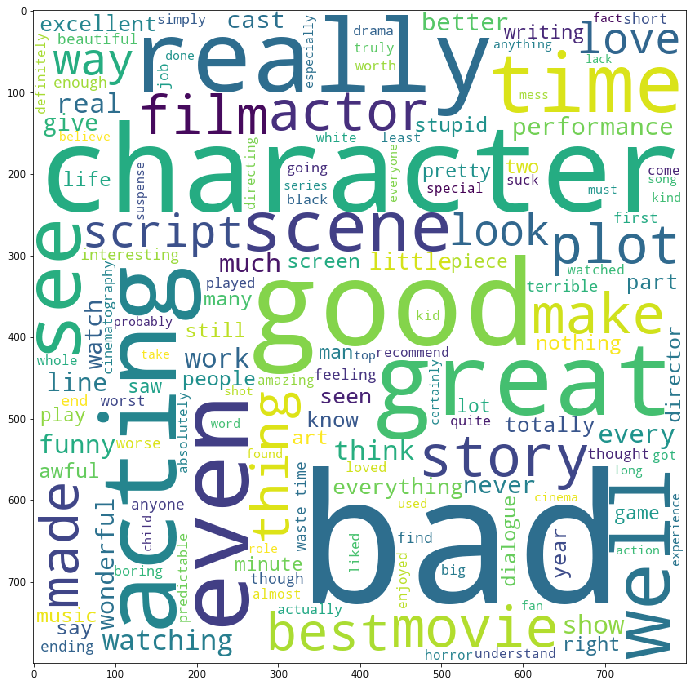

In [110]:
plt.figure(figsize = [12,12])
plt.imshow(word_cloud)
plt.show()

In [111]:
word_freq={}
all_items = []
all_items =clean_reviews_combine.split(' ')
for i in all_items:
    word_freq[i] = word_freq.get(i,0) + 1
print(word_freq)

{'slow-moving': 1, 'aimless': 1, 'distressed': 1, 'drifting': 1, 'young': 4, 'man': 13, 'sure': 3, 'lost': 4, 'flat': 2, 'character': 58, 'audience': 5, 'nearly': 1, 'half': 6, 'walked': 2, 'attempting': 1, 'artiness': 1, 'black': 10, 'white': 9, 'clever': 5, 'camera': 8, 'angle': 3, 'disappointed': 6, 'became': 2, 'even': 40, 'ridiculous': 5, 'acting': 42, 'poor': 6, 'plot': 27, 'line': 19, 'almost': 9, 'non-existent': 1, 'little': 17, 'music': 14, 'anything': 8, 'speak': 3, 'best': 25, 'scene': 33, 'gerardo': 1, 'trying': 4, 'find': 11, 'song': 8, 'keep': 6, 'running': 2, 'head': 3, 'rest': 4, 'lack': 7, 'art': 13, 'charm': 2, 'meaning': 4, '...': 40, 'emptiness': 1, 'work': 23, 'guess': 5, 'empty': 2, 'wasted': 7, 'two': 13, 'hour': 9, 'saw': 12, 'today': 4, 'thought': 13, 'good': 56, 'effort': 2, 'message': 1, 'kid': 9, 'bit': 5, 'predictable': 10, 'loved': 10, 'casting': 6, 'jimmy': 2, 'buffet': 1, 'science': 1, 'teacher': 1, 'baby': 1, 'owl': 1, 'adorable': 3, 'showed': 3, 'lot':

In [112]:
freq = {'words':list(word_freq.keys()),'freq':list(word_freq.values())}
df_freq = pd.DataFrame(freq)
plot_df = df_freq.sort_values(ascending = False, by = 'freq')
plot_df.head()

,words,freq
463,bad,68
9,character,58
60,good,56
239,like,49
185,time,47


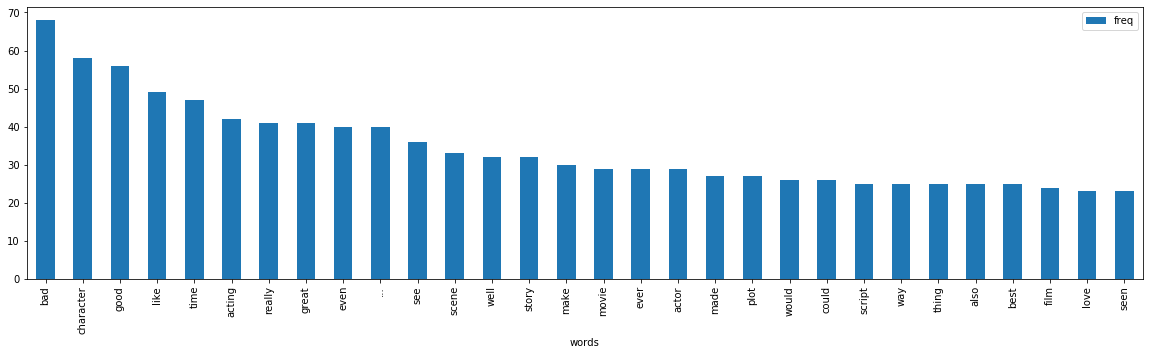

In [113]:
plot_df.head(30).plot.bar(x = 'words',y = 'freq', figsize=(20,5))

In [102]:
?WordCloud